# Exploratory Data Analysis


In [1]:
!pip install memory-profiler

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
%load_ext memory_profiler

In [3]:
#Loading Libraries and dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt #Works as API. It is matlab of python
import seaborn as sns
%matplotlib inline

#Set plotting Styles
plt.style.use('ggplot')

In [5]:
#Load the dataset
#parse_dates is to convert string dt to datetime dt for date column
df=pd.read_csv(r'C:\Users\aturk\Desktop\data sources for python project\DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [6]:
#Sort the dataset
df.sort_index(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [8]:
df.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [9]:
#Identify dublicate dates(indices) 
duplicate_index=df[df.index.duplicated(keep=False)]
print(df.loc[duplicate_index.index.values, :])

                     DUQ_MW
Datetime                   
2014-11-02 02:00:00  1272.0
2014-11-02 02:00:00  1240.0
2014-11-02 02:00:00  1272.0
2014-11-02 02:00:00  1240.0
2015-11-01 02:00:00  1113.0
2015-11-01 02:00:00  1138.0
2015-11-01 02:00:00  1113.0
2015-11-01 02:00:00  1138.0
2016-11-06 02:00:00  1121.0
2016-11-06 02:00:00  1107.0
2016-11-06 02:00:00  1121.0
2016-11-06 02:00:00  1107.0
2017-11-05 02:00:00  1131.0
2017-11-05 02:00:00  1105.0
2017-11-05 02:00:00  1131.0
2017-11-05 02:00:00  1105.0


In [10]:
#Replace duplicated with mean value
df=df.groupby('Datetime').agg(np.mean)

In [11]:
#Checking if it worked
duplicate_index=df[df.index.duplicated(keep=False)]
print(df.loc[duplicate_index.index.values, :])

#Yes, it did!

Empty DataFrame
Columns: [DUQ_MW]
Index: []


In [12]:
#Set datetimeIndex frequency to hourly

df=df.asfreq('H')

In [13]:
#Finding missing values
missing_values=df['DUQ_MW'].isnull().sum()

In [14]:
print(missing_values)

24


In [15]:
print('# of Missing DUQ_MW Values: {}'.format(df['DUQ_MW'].isnull().sum()))

# of Missing DUQ_MW Values: 24


In [16]:
#To impute missing values I choose interpolation method as data is time series
df['DUQ_MW']=df['DUQ_MW'].interpolate(limit_area='inside',limit=None)


In [17]:
#Checking my dt if missing values are replaced
print(df['DUQ_MW'].isnull().sum())
#Yes, it did!

0


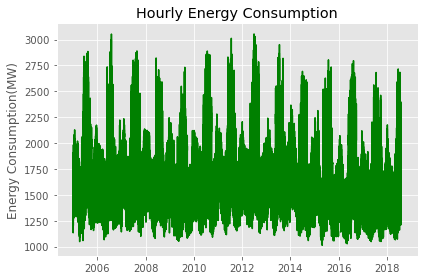

<Figure size 432x288 with 0 Axes>

In [18]:
#Time series plot of hourly energy consumption
plt.plot(df.index,df['DUQ_MW'], label='Hourly Energy Consumption',color='green')
plt.ylabel('Energy Consumption(MW)')
plt.title('Hourly Energy Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('HourlyEnergyConsumption.png')
# There is definetely an annual seasonality however plot is too dense to analyze individual years 

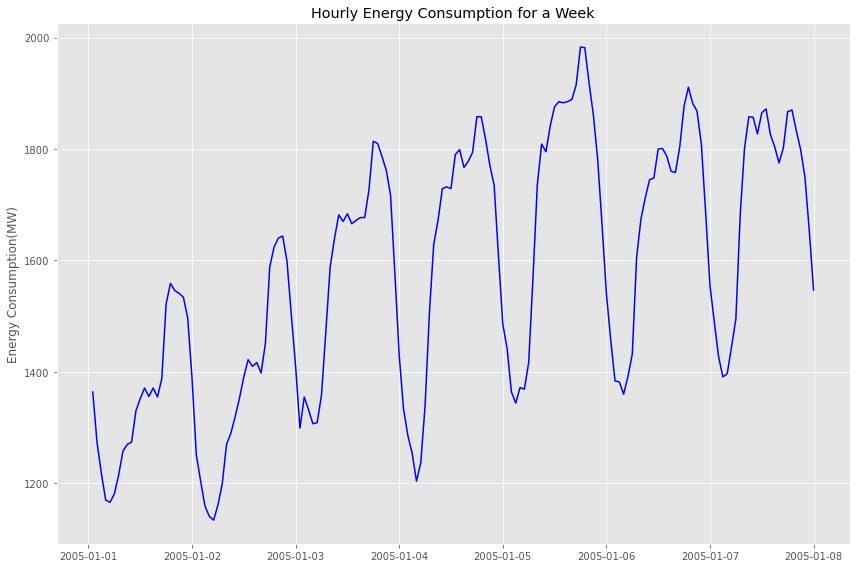

In [19]:
week_index=24*7
plt.figure(figsize=(12,8))
plt.plot(df.index[:week_index],df['DUQ_MW'][:week_index], label='Hourly Energy Consumption',color='b')
plt.ylabel('Energy Consumption(MW)')
plt.title('Hourly Energy Consumption for a Week')
plt.grid(True)
plt.tight_layout()
plt.show()

#There is an obvious daily trend 

In [20]:
#Creating more daily features

def create_features(df):
    df['Date']=df.index
    df['Hour']=df['Date'].dt.hour
    df['DayOfWeek']=df['Date'].dt.dayofweek
    df['Quarter']=df['Date'].dt.quarter
    df['Month']=df["Date"].dt.month
    df['Year']=df['Date'].dt.year
    df['DayOfYear']=df['Date'].dt.dayofyear
    df['DayOfMonth']=df["Date"].dt.day
    df['WeekOfYear']=df["Date"].dt.weekofyear
    df['DayOfYearFloat']=df['DayOfYear']+df['Hour']/24
    df.drop('Date', axis=1, inplace=True)
    return df


In [21]:
df=create_features(df)

<ipython-input-20-8af6249eb664>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['WeekOfYear']=df["Date"].dt.weekofyear


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119088 entries, 2005-01-01 01:00:00 to 2018-08-03 00:00:00
Freq: H
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DUQ_MW          119088 non-null  float64
 1   Hour            119088 non-null  int64  
 2   DayOfWeek       119088 non-null  int64  
 3   Quarter         119088 non-null  int64  
 4   Month           119088 non-null  int64  
 5   Year            119088 non-null  int64  
 6   DayOfYear       119088 non-null  int64  
 7   DayOfMonth      119088 non-null  int64  
 8   WeekOfYear      119088 non-null  int64  
 9   DayOfYearFloat  119088 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 10.0 MB


In [23]:
df.head()

,DUQ_MW,Hour,DayOfWeek,Quarter,Month,Year,DayOfYear,DayOfMonth,WeekOfYear,DayOfYearFloat
Datetime,,,,,,,,,,
2005-01-01 01:00:00,1364.0,1,5,1,1,2005,1,1,53,1.041667
2005-01-01 02:00:00,1273.0,2,5,1,1,2005,1,1,53,1.083333
2005-01-01 03:00:00,1218.0,3,5,1,1,2005,1,1,53,1.125000
2005-01-01 04:00:00,1170.0,4,5,1,1,2005,1,1,53,1.166667
2005-01-01 05:00:00,1166.0,5,5,1,1,2005,1,1,53,1.208333


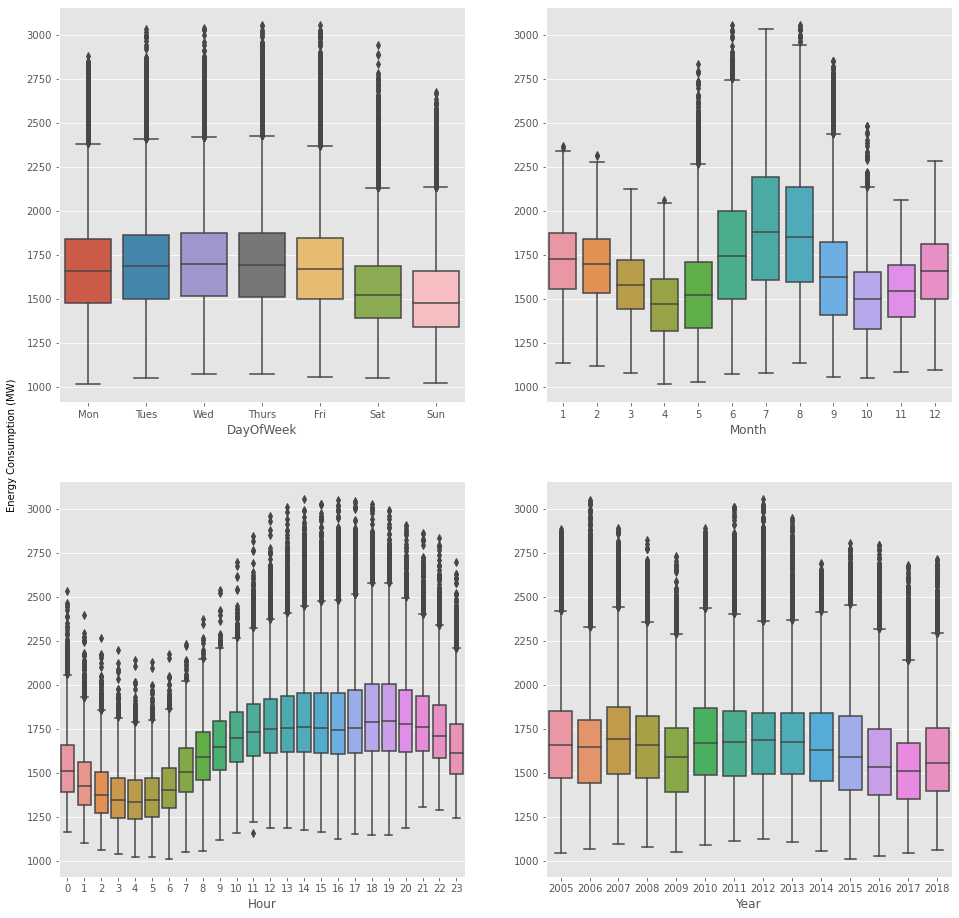

In [24]:
fig, axes= plt.subplots(2,2, figsize=(16,16))

#Day of Week
labels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

g = sns.boxplot(x=df['DayOfWeek'], y=df['DUQ_MW'], ax=axes[0][0])
g.set_xticklabels(labels)
g.set_ylabel('')

#Month of the Year

g = sns.boxplot(x=df['Month'], y=df['DUQ_MW'], ax=axes[0][1])
g.set_ylabel('')

#Hour of the Day

g = sns.boxplot(x=df['Hour'], y=df['DUQ_MW'], ax=axes[1][0])
g.set_ylabel('')

#Year

g = sns.boxplot(x=df['Year'], y=df['DUQ_MW'], ax=axes[1][1])
g.set_ylabel('')

fig.text(0.08, 0.5, 'Energy Consumption (MW)', va='center', rotation='vertical')
plt.show()


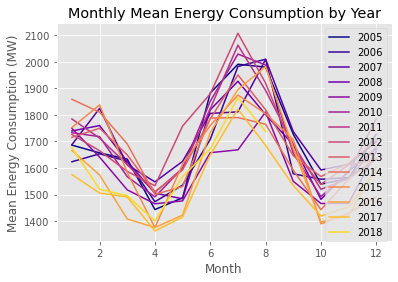

<Figure size 1440x1728 with 0 Axes>

In [25]:
#Looking at yearly energy consumption changes
df_year_grouped=df.groupby(['Year','Month']).mean().reset_index()
years=df['Year'].unique()
NumberOfColors=len(years)
cm=plt.get_cmap('plasma')
fig=plt.figure()
ax=fig.add_subplot(111)
#fig, ax=plt.subplots()
ax.set_prop_cycle(color=[cm(1.*i/NumberOfColors) for i in range(NumberOfColors)])

for i, y in enumerate(years):
    df1=df_year_grouped[df_year_grouped['Year']==y]
    #Finding energy consumption mean by each year
    df1['DUQ_MW'].rolling(window=7*24).mean()
    plt.plot(df1['Month'], df1['DUQ_MW'])

plt.title("Monthly Mean Energy Consumption by Year")
plt.xlabel('Month')
plt.ylabel('Mean Energy Consumption (MW)')
plt.legend(df.Year.unique())
#ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.figure(figsize=(20,24))
plt.show()

In [26]:
print(df['Year'].unique())

[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


In [27]:
#Moving Average(Smoothing)
Monthly_period=30*24
Midyear_period=182*24
Year_period=365*24

month_roll=df['DUQ_MW'].rolling(window=Monthly_period).mean()
midyear_roll=df['DUQ_MW'].rolling(window=Midyear_period).mean()
year_roll=df['DUQ_MW'].rolling(window=Year_period).mean()
month_roll=month_roll.reset_index()
midyear_roll=midyear_roll.reset_index()
year_roll=year_roll.reset_index()

In [28]:
print(year_roll)

                  Datetime       DUQ_MW
0      2005-01-01 01:00:00          NaN
1      2005-01-01 02:00:00          NaN
2      2005-01-01 03:00:00          NaN
3      2005-01-01 04:00:00          NaN
4      2005-01-01 05:00:00          NaN
...                    ...          ...
119083 2018-08-02 20:00:00  1573.157648
119084 2018-08-02 21:00:00  1573.143265
119085 2018-08-02 22:00:00  1573.132534
119086 2018-08-02 23:00:00  1573.126598
119087 2018-08-03 00:00:00  1573.123402

[119088 rows x 2 columns]


In [29]:
len(month_roll[month_roll.isna()])

119088

In [30]:
print(year_roll.index)

RangeIndex(start=0, stop=119088, step=1)


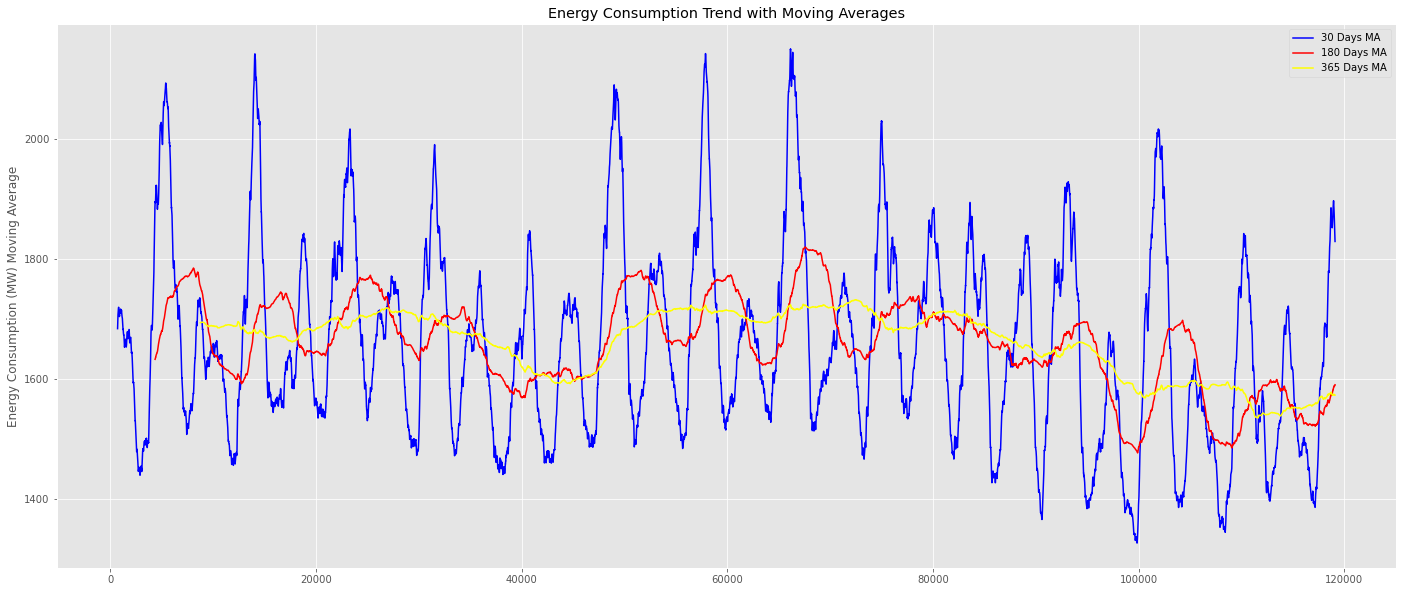

In [31]:
fig, ax=plt.subplots(figsize=(24,10))
plt.plot(month_roll.index, month_roll['DUQ_MW'], label='30 Days MA', color='blue')
plt.plot(midyear_roll.index, midyear_roll['DUQ_MW'], label='180 Days MA', color='red')
plt.plot(year_roll.index, year_roll['DUQ_MW'], label='365 Days MA', color='yellow')
plt.title('Energy Consumption Trend with Moving Averages')
plt.ylabel('Energy Consumption (MW) Moving Average')
plt.legend()
plt.show()


In [32]:
#Seasonal Subplots
num_years=len(df["Year"].unique())
print(num_years)

14


In [33]:
years=df['Year'].unique()
print(years)

[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


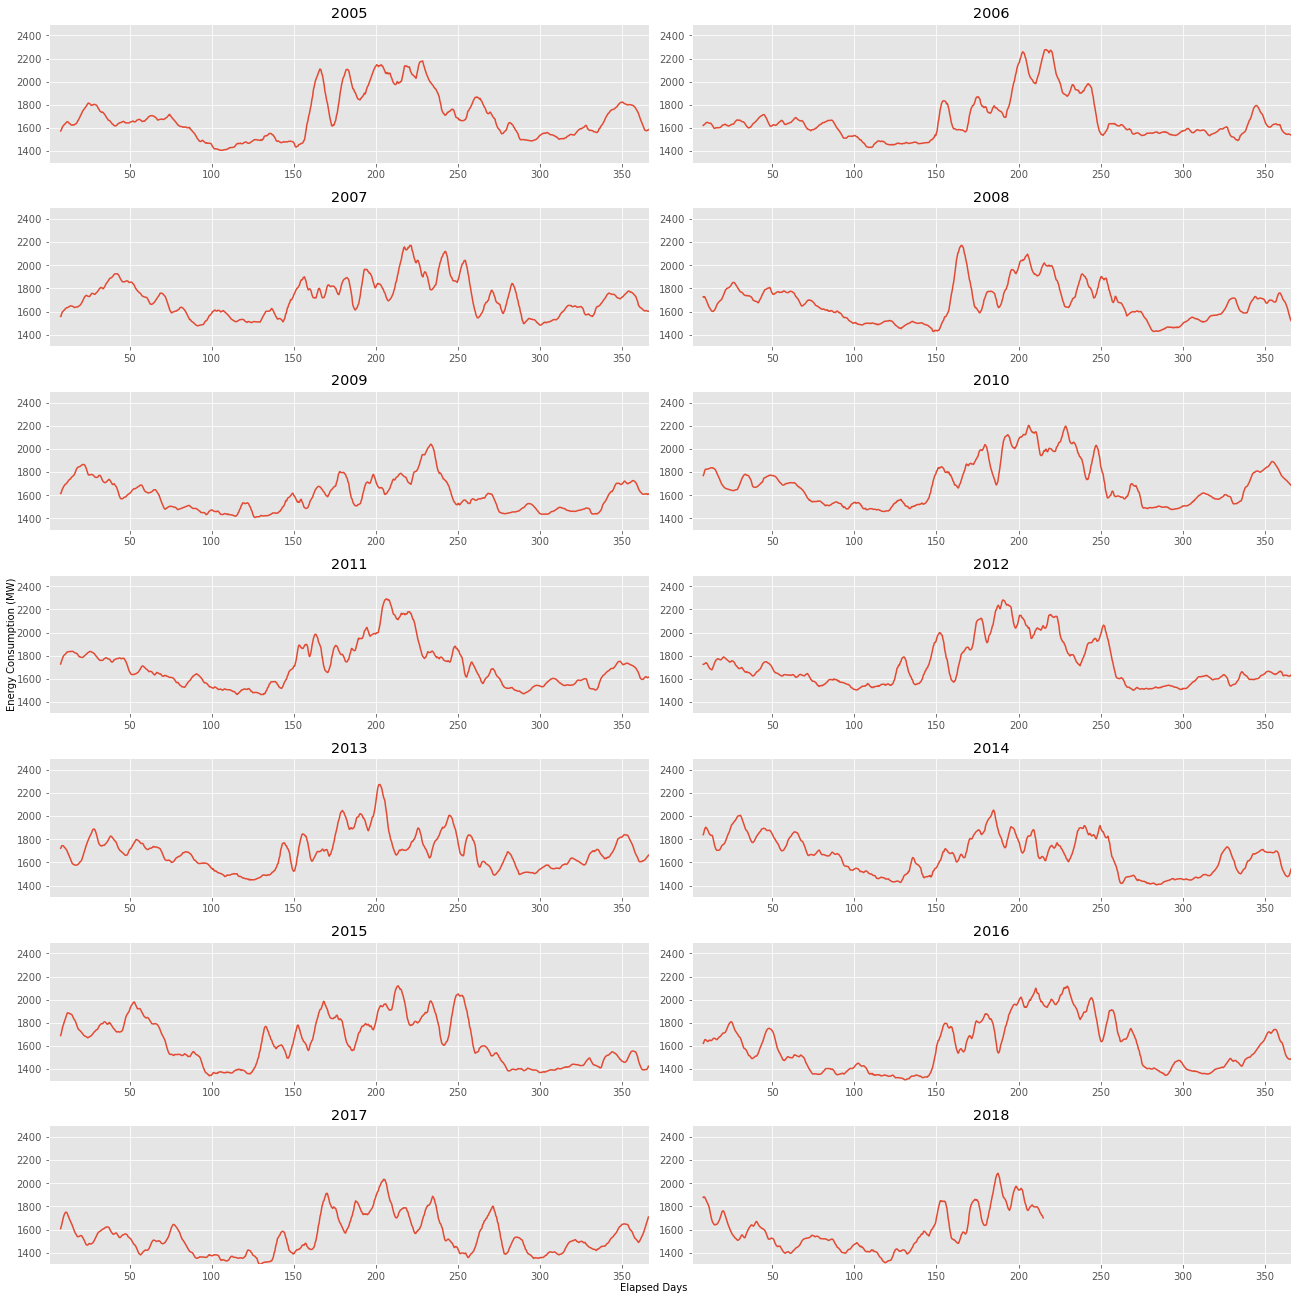

In [34]:
num_cols=2
num_rows=int(num_years/num_cols)

fig, ax=plt.subplots(num_rows, num_cols, figsize=(18,18))
a=0
for i in range(num_rows):
    for j in range(num_cols):
        df_ff=df[df["Year"]==years[a]]
        ma_mw=df_ff["DUQ_MW"].rolling(window=7*24).mean()
        ax[i][j].plot(df_ff['DayOfYearFloat'],ma_mw.values)
        ax[i][j].set_title(str(years[a]))
        ax[i][j].set_ylim(1300, 2500)
        ax[i][j].set_xlim(1,366)
        a=a+1
        plt.tight_layout()
fig.text(0.001, 0.5, 'Energy Consumption (MW)', va='center', rotation='vertical')
fig.text(0.5, 0.001, 'Elapsed Days', ha='center')
plt.show()    

In [35]:
#Checking Seasonality Variation through time to indicate if it is additive or multiplicative time series

day_min=df.groupby(['Year', 'DayOfYear']).min()['DUQ_MW'].values

In [36]:
day_max=df.groupby(['Year', 'DayOfYear']).max()['DUQ_MW'].values

In [37]:
print(type(day_max))

<class 'numpy.ndarray'>


In [38]:
daily_diff=day_max-day_min
print(type(daily_diff))

<class 'numpy.ndarray'>


In [39]:
print(daily_diff)

[393. 510. 515. ... 724. 704.   0.]


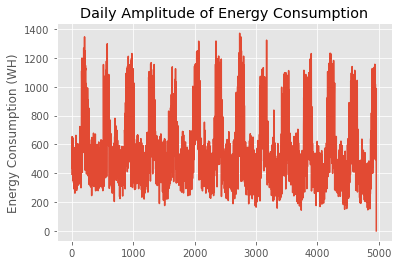

In [40]:
plt.plot(daily_diff)
plt.title('Daily Amplitude of Energy Consumption')
plt.ylabel('Energy Consumption (WH)')
plt.show()

#Indicates a multiplicative model as seasonality impact changes over time

<Figure size 864x576 with 0 Axes>

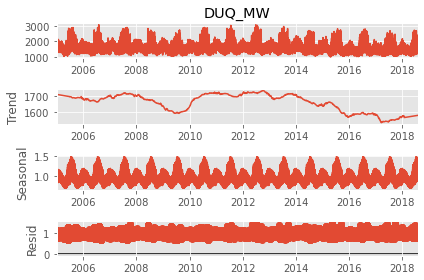

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(12,8))

annual=365*24
multip_decomp=seasonal_decompose(df['DUQ_MW'], model='multiplicative', extrapolate_trend='freq', period=annual)
multip_decomp.plot()
plt.show()

In [42]:
#ADF Test for stationarity
from statsmodels.tsa.stattools import adfuller

adf_results=adfuller(df['DUQ_MW'])

print(f'ADF Statistic: {adf_results[0]}')
print(f'p-value: {adf_results[1]}')


ADF Statistic: -17.625571497510435
p-value: 3.820189800493896e-30


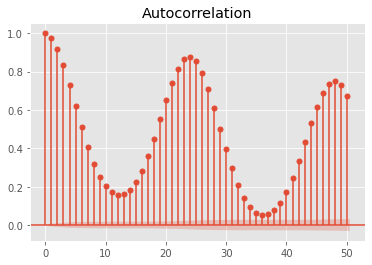

In [43]:
#ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['DUQ_MW'], lags=50)
plt.show()

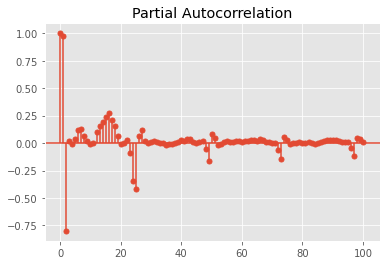

In [44]:
"""
PACF, A typical autocorrelation includes the effects from both
the direct correlation between an observation at a lagged time value
and the present value 
as well as correlations between intermediate time values and the present value
By removing the intermediate correlations, we got PACF that can determine
the order of my moving average model
"""

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['DUQ_MW'], lags=100)
plt.show()

# Baseline ARIMA Models

# one-step forecasting approach using a simple AR(1) model

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
MSE: 4575.355


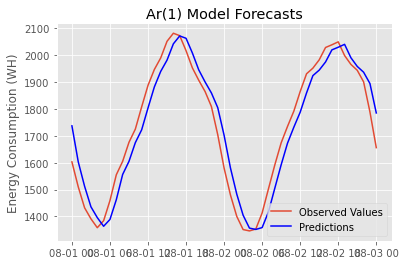

In [54]:
%load_ext memory_profiler

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is a DataFrame with a datetime index and 'DUQ_MW' column
train_series = df.loc[(df.index >= datetime(2014, 1, 1)) & (df.index < datetime(2018, 8, 1)), 'DUQ_MW']
test_series = df.loc[(df.index >= datetime(2018, 8, 1)), 'DUQ_MW']

ar_preds = []
history = [x for x in train_series]

for t in range(len(test_series)):
    model = ARIMA(history, order=(1, 0, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    ar_preds.append(output[0])
    history.append(test_series.iloc[t])

ar_pred_series = pd.Series(ar_preds, index=test_series.index)

error = mean_squared_error(test_series, ar_pred_series)
print('MSE: %.3f' % error)

plt.plot(test_series, label='Observed Values')
plt.plot(ar_pred_series, color='blue', label='Predictions')
plt.legend()
plt.title('Ar(1) Model Forecasts')
plt.ylabel('Energy Consumption (WH)')
plt.show()

one-step forecasting approach using a simple MA(1) model

In [60]:
"""
%load_ext memory_profiler
ma_preds=[]
history = [x for x in train_series]

for t in range(len(test_series)):
    model=ARIMA(history, order=(0,0,1))
    model_fit=model.fit()
    output=model_fit.forecast()
    ma_preds.append(output[0])
    history.append(test_series[t])
    
ma_preds_series=pd.Series(ma_preds, index=test_series.index)

error=mean_squared_error(test_series, ma_pred_series)
print('MSE: %.3f' % error)

plt.plot(test_series, label='Observed Values')
plt.plot(ma_preds_series, color='blue', label='Predictions')
plt.legend()
plt.title('MA(1) Model Forecasts')
plt.ylabel('Energy Consumption (MW)')
plt.show()
"""

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


KeyboardInterrupt: 

#ARIMA FORECAST

MSE: 952.900


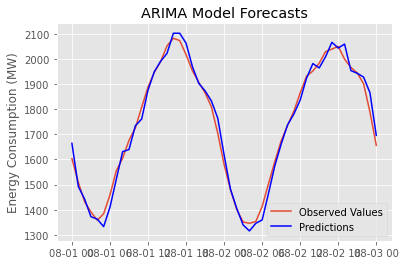

In [63]:
arima_preds=[]
history = [x for x in train_series]

for t in range(len(test_series)):
    model=ARIMA(history, order=(1,1,1))
    model_fit=model.fit()
    output=model_fit.forecast()
    arima_preds.append(output[0])
    history.append(test_series[t])
    
arima_preds_series=pd.Series(arima_preds, index=test_series.index)

error=mean_squared_error(test_series, arima_preds_series)
print('MSE: %.3f' % error)

plt.plot(test_series, label='Observed Values')
plt.plot(arima_preds_series, color='blue', label='Predictions')
plt.legend()
plt.title('ARIMA Model Forecasts')
plt.ylabel('Energy Consumption (MW)')
plt.show()

#SARIMAx FORECAST

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_preds = []
history = [x for x in train_series]

for t in range(len(test_series)):
    model = SARIMAX(history, order=(1,1,1), seasonal_order=(1,1,1,24), enforce_stationarity=False, enfore_invertibility=False)
    model_fit = model.fit()
    output = model_fit.forecast()
    sarima_preds.append(output[0])
    history.append(test_series[t])

sarima_pred_series = pd.Series(sarima_preds, index=test_series.index)

error = mean_squared_error(test_series, sarima_pred_series)
print('MSE: %.3f' % error)

plt.plot(test_series, label='Observed Values')
plt.plot(sarima_pred_series, color='blue', label='Forecasted Values')
plt.legend()
plt.title('SARIMA Model Forecasts')
plt.ylabel('Energy Consumption (MW)')
plt.show()

MemoryError: Unable to allocate 797. MiB for an array with shape (51, 51, 40153) and data type float64